# Stock Prediction

# Introduction
- Stock price represents the current market value of a publicly traded company's shares.
- Investors buy these shares, becoming shareholders with a stake in the company's assets and earnings.
- Stock prices are determined by supply and demand in the stock market and fluctuate due to various factors.
- Key factors influencing stock prices include the company's financial performance, economic conditions, investor sentiment, industry trends, and global events.
- Positive company earnings, growth prospects, and effective management can boost stock prices, while economic downturns, negative news, or adverse industry trends can have the opposite effect.
- Volatility is common in stock prices, offering both opportunities and risks for investors.
- Stock prices play a crucial role in investment decisions, with investors using strategies like fundamental analysis and technical analysis to evaluate them.
- These prices are often grouped in stock market indices, providing a broader view of market performance.
- Investors may have varying time horizons, seeking long-term growth or engaging in short-term trading.
- In summary, stock prices are essential indicators of a company's value and market dynamics, reflecting a complex interplay of financial, economic, and psychological factors in the world of finance and investment.
- Understanding these prices is vital for effective investment decision-making.
- I will employ the LSTM Machine algorithm in this task to facilitate stock price prediction, making it more accessible for investors to make informed decisions.

# Data Description

- I have considered the dataset of Tata from 09/2018 to 09/2023.
- This dataset contains information about **1235 records having 7 features** such as Date, Open, High, Low, Close, Adj Close and Volume.

**Attribute Information of the Dataset:**
- **Date:** The Date of stock price.
- **Open:** The price at which a stock started trading. 
- **Low:** Lowest price of stock on that period.
- **Close:** The price at which a stock close trading.
- **Adj Close:** Adjusted close price of a stock.
- **Volume:** Total amount of trading activity.



## Importing Required Libraries

In [1]:
# For Data manipulation
import numpy as np
import pandas as pd

# For Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
# Since, the data is in csv format. we will create a dataframe using csv function to read the data.
data = pd.read_csv('Tata.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-24,233.550003,239.199997,230.750000,233.300003,223.482330,3423509
1,2018-09-25,233.300003,236.750000,232.000000,236.100006,226.164505,2349368
2,2018-09-26,240.000000,240.000000,232.500000,234.250000,224.392334,2240909
3,2018-09-27,234.550003,236.800003,231.100006,233.250000,223.434418,5082859
4,2018-09-28,234.050003,235.949997,230.199997,233.750000,223.913376,3069914


In [3]:
# Checking the shape of the data
data.shape

(1235, 7)

- Based on its shape, we can conclude that this dataset contains 1235 records with 7 features.

In [4]:
# Checking the data types of each feature.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [5]:
# Checking the how data has been spread for the numerical values.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1235.0,5.616223e+02,2.341262e+02,179.050003,3.123000e+02,6.340000e+02,7.691250e+02,8.950000e+02
High,1235.0,5.683896e+02,2.354642e+02,186.000000,3.182750e+02,6.435000e+02,7.761000e+02,8.977000e+02
Low,1235.0,5.542523e+02,2.320792e+02,177.050003,3.083000e+02,6.242500e+02,7.620500e+02,8.810000e+02
Close,1235.0,5.611759e+02,2.337302e+02,179.750000,3.128750e+02,6.321500e+02,7.682750e+02,8.893000e+02
Adj Close,1235.0,5.507893e+02,2.335148e+02,172.185776,3.029978e+02,6.166987e+02,7.583048e+02,8.893000e+02
Volume,1235.0,2.840363e+06,3.376131e+06,0.000000,1.251931e+06,2.023148e+06,3.330236e+06,6.355124e+07


In [6]:
# Check for duplicate data

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 0


,Date,Open,High,Low,Close,Adj Close,Volume


- No duplicates has been found.

In [7]:
# Check for missing values

data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

- No missing values has been found.

In [8]:
# Setting date column as index
data.set_index('Date',drop=True,inplace=True)

In [9]:
# Extracting required columns
df = data[['Open','Close']] 
df.head()

,Open,Close
Date,,
2018-09-24,233.550003,233.300003
2018-09-25,233.300003,236.100006
2018-09-26,240.000000,234.250000
2018-09-27,234.550003,233.250000
2018-09-28,234.050003,233.750000


In [10]:
# Checking the shape of Target Feature
df.shape

(1235, 2)

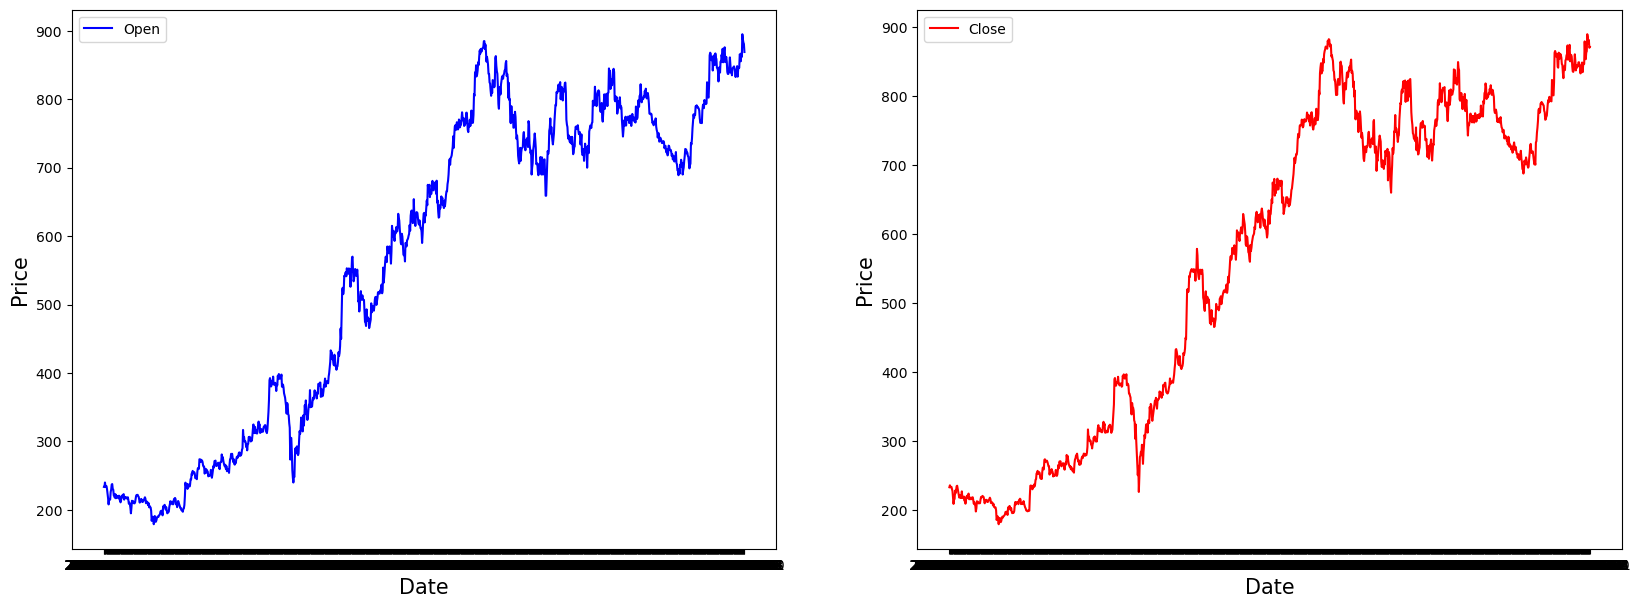

In [11]:
fig,ax =plt.subplots(1,2,figsize=(20,7))

ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

plt.show()

- LSTM are sensitive to the scale of data. So we will apply MinMax Scaler.

**Feature Scaling**

In [12]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
df[df.columns]= sc.fit_transform(df)
df.head()

,Open,Close
Date,,
2018-09-24,0.076123,0.075470
2018-09-25,0.075773,0.079417
2018-09-26,0.085132,0.076809
2018-09-27,0.077519,0.075400
2018-09-28,0.076821,0.076105


**splitting the dataset into train and test split**

In [13]:
training_size = round(len(df) * 0.70)
training_size

864

In [14]:
train_data = df[:training_size]
test_data = df[training_size:]

In [15]:
train_data.shape, test_data.shape

((864, 2), (371, 2))

## Data PreProcessing

In [16]:
def create (dataset):
    X = []
    y = []
    start = 0
    # Selecting 50 rows
    for stop in range(50,len(dataset)): 
        X.append(dataset.iloc[start:stop])
        y.append(dataset.iloc[stop])
        start += 1
    return (np.array(X) ,np.array(y))

In [17]:
X_train, y_train = create(train_data)
X_test, y_test = create(test_data)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((814, 50, 2), (814, 2), (321, 50, 2), (321, 2))

## Model Building

In [18]:
# Creating the Stacked LSTM model
# Importing required libraries

from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [19]:
# imported Sequential from keras.models
model = Sequential()

# importing Dense, Dropout, LSTM, Bidirectional from keras.Layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=50) )
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- The number of neurons in the LSTM layer is 50.
- We set the return sequence to True because we need to add another layer after the current one.
- The input shape indicates the number of timestamps and indicators, respectively.
- The output dimension is 2, as we are predicting open and close price at a time.

In [20]:
a= model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 4s 97ms/step - loss: 0.0782 - mean_absolute_error: 0.1987 - val_loss: 0.0103 - val_mean_absolute_error: 0.0875
Epoch 2/100
13/13 [==============================] - 1s 39ms/step - loss: 0.0080 - mean_absolute_error: 0.0701 - val_loss: 0.0128 - val_mean_absolute_error: 0.0950
Epoch 3/100
13/13 [==============================] - 1s 40ms/step - loss: 0.0038 - mean_absolute_error: 0.0502 - val_loss: 0.0036 - val_mean_absolute_error: 0.0503
Epoch 4/100
13/13 [==============================] - 1s 40ms/step - loss: 0.0018 - mean_absolute_error: 0.0327 - val_loss: 0.0022 - val_mean_absolute_error: 0.0387
Epoch 5/100
13/13 [==============================] - 1s 39ms/step - loss: 0.0015 - mean_absolute_error: 0.0282 - val_loss: 0.0010 - val_mean_absolute_error: 0.0261
Epoch 6/100
13/13 [==============================] - 1s 38ms/step - loss: 0.0013 - mean_absolute_error: 0.0268 - val_loss: 9.6931e-04 - val_mean_absolute_error: 0.0253
Epoch 7/100


## Model Prediction

In [21]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 8ms/step


In [22]:
# Transform back to original form
train_predict_org = sc.inverse_transform(train_predict)
test_predict_org = sc.inverse_transform(test_predict)

In [23]:
merge_df = pd.concat([df.iloc[-321:].copy(),
pd.DataFrame(test_predict_org, columns=[ 'Open_predicted','Close_predicted'],
index=df.iloc[-321:].index)], axis=1)

In [24]:
merge_df[['Open','Close']] = sc.inverse_transform(merge_df[['Open','Close']])
merge_df.head()

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2022-06-08,754.349976,757.150024,762.341675,758.369385
2022-06-09,749.000000,754.400024,762.883667,758.616760
2022-06-10,750.000000,756.599976,761.321045,756.766479
2022-06-13,752.000000,735.950012,758.942383,754.212708
2022-06-14,734.000000,735.849976,754.518127,749.634399


**Validation loss curve**

In [25]:
# Extract the loss and validation loss values from 'a'
training_loss = a.history['loss']
validation_loss = a.history['val_loss']

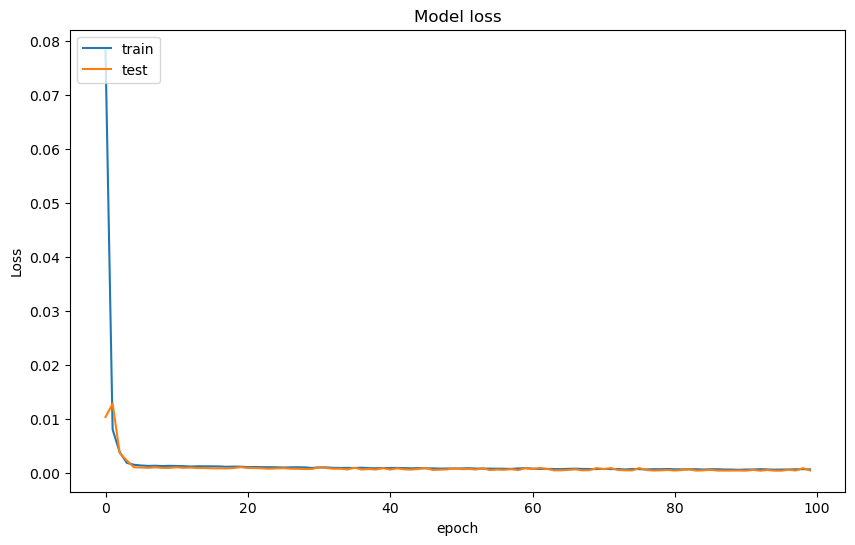

In [26]:
plt.figure(figsize= (10,6))
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

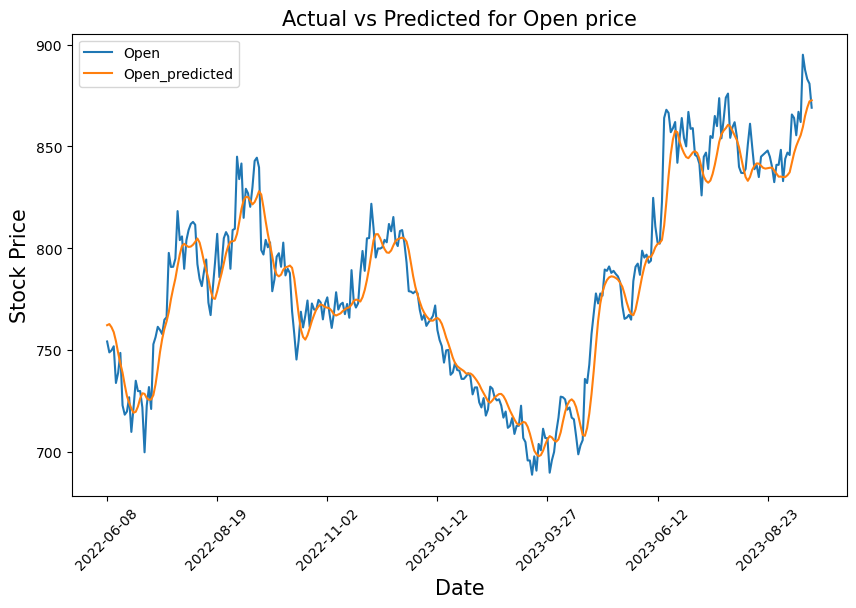

In [27]:
merge_df[['Open', 'Open_predicted']].plot(figsize=(10,6) )
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Open price',size=15)
plt.show()

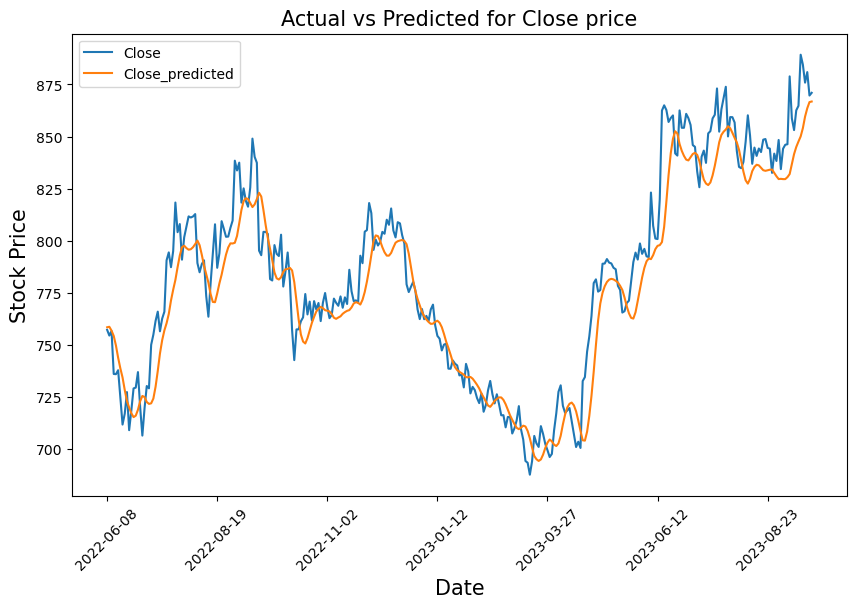

In [28]:
# plotting the actual close and predicted close prices on date index
merge_df[['Close','Close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for Close price',size=15)
plt.show()

- As evident from the chart above, the model closely approximates the actual stock price trends. Consequently, it can be inferred that this LSTM model is likely to yield high accuracy for this dataset.
- However, the model's accuracy could be improved further by expanding the training dataset and augmenting the number of LSTM layers.